In [1]:
file_list = [
'sample_apply.pdf',     
'rm/candidate_file_file_631959_履歴書.pdf', 
'rm/candidate_file_file_631373__履歴書.pdf', 
'rm/candidate_file_file_631735__履歴書.pdf', 
'rm/candidate_file_file_631805_2.pdf', 
'rm/candidate_file_file_631810_2.pdf', 
'rm/candidate_file_file_631814_2.pdf', 
'rm/candidate_file_file_631823_2.pdf', 
'rm/candidate_file_file_631833_2.pdf', 
'rm/candidate_file_file_631895_2.pdf', 
'rm/candidate_file_file_632044.pdf']

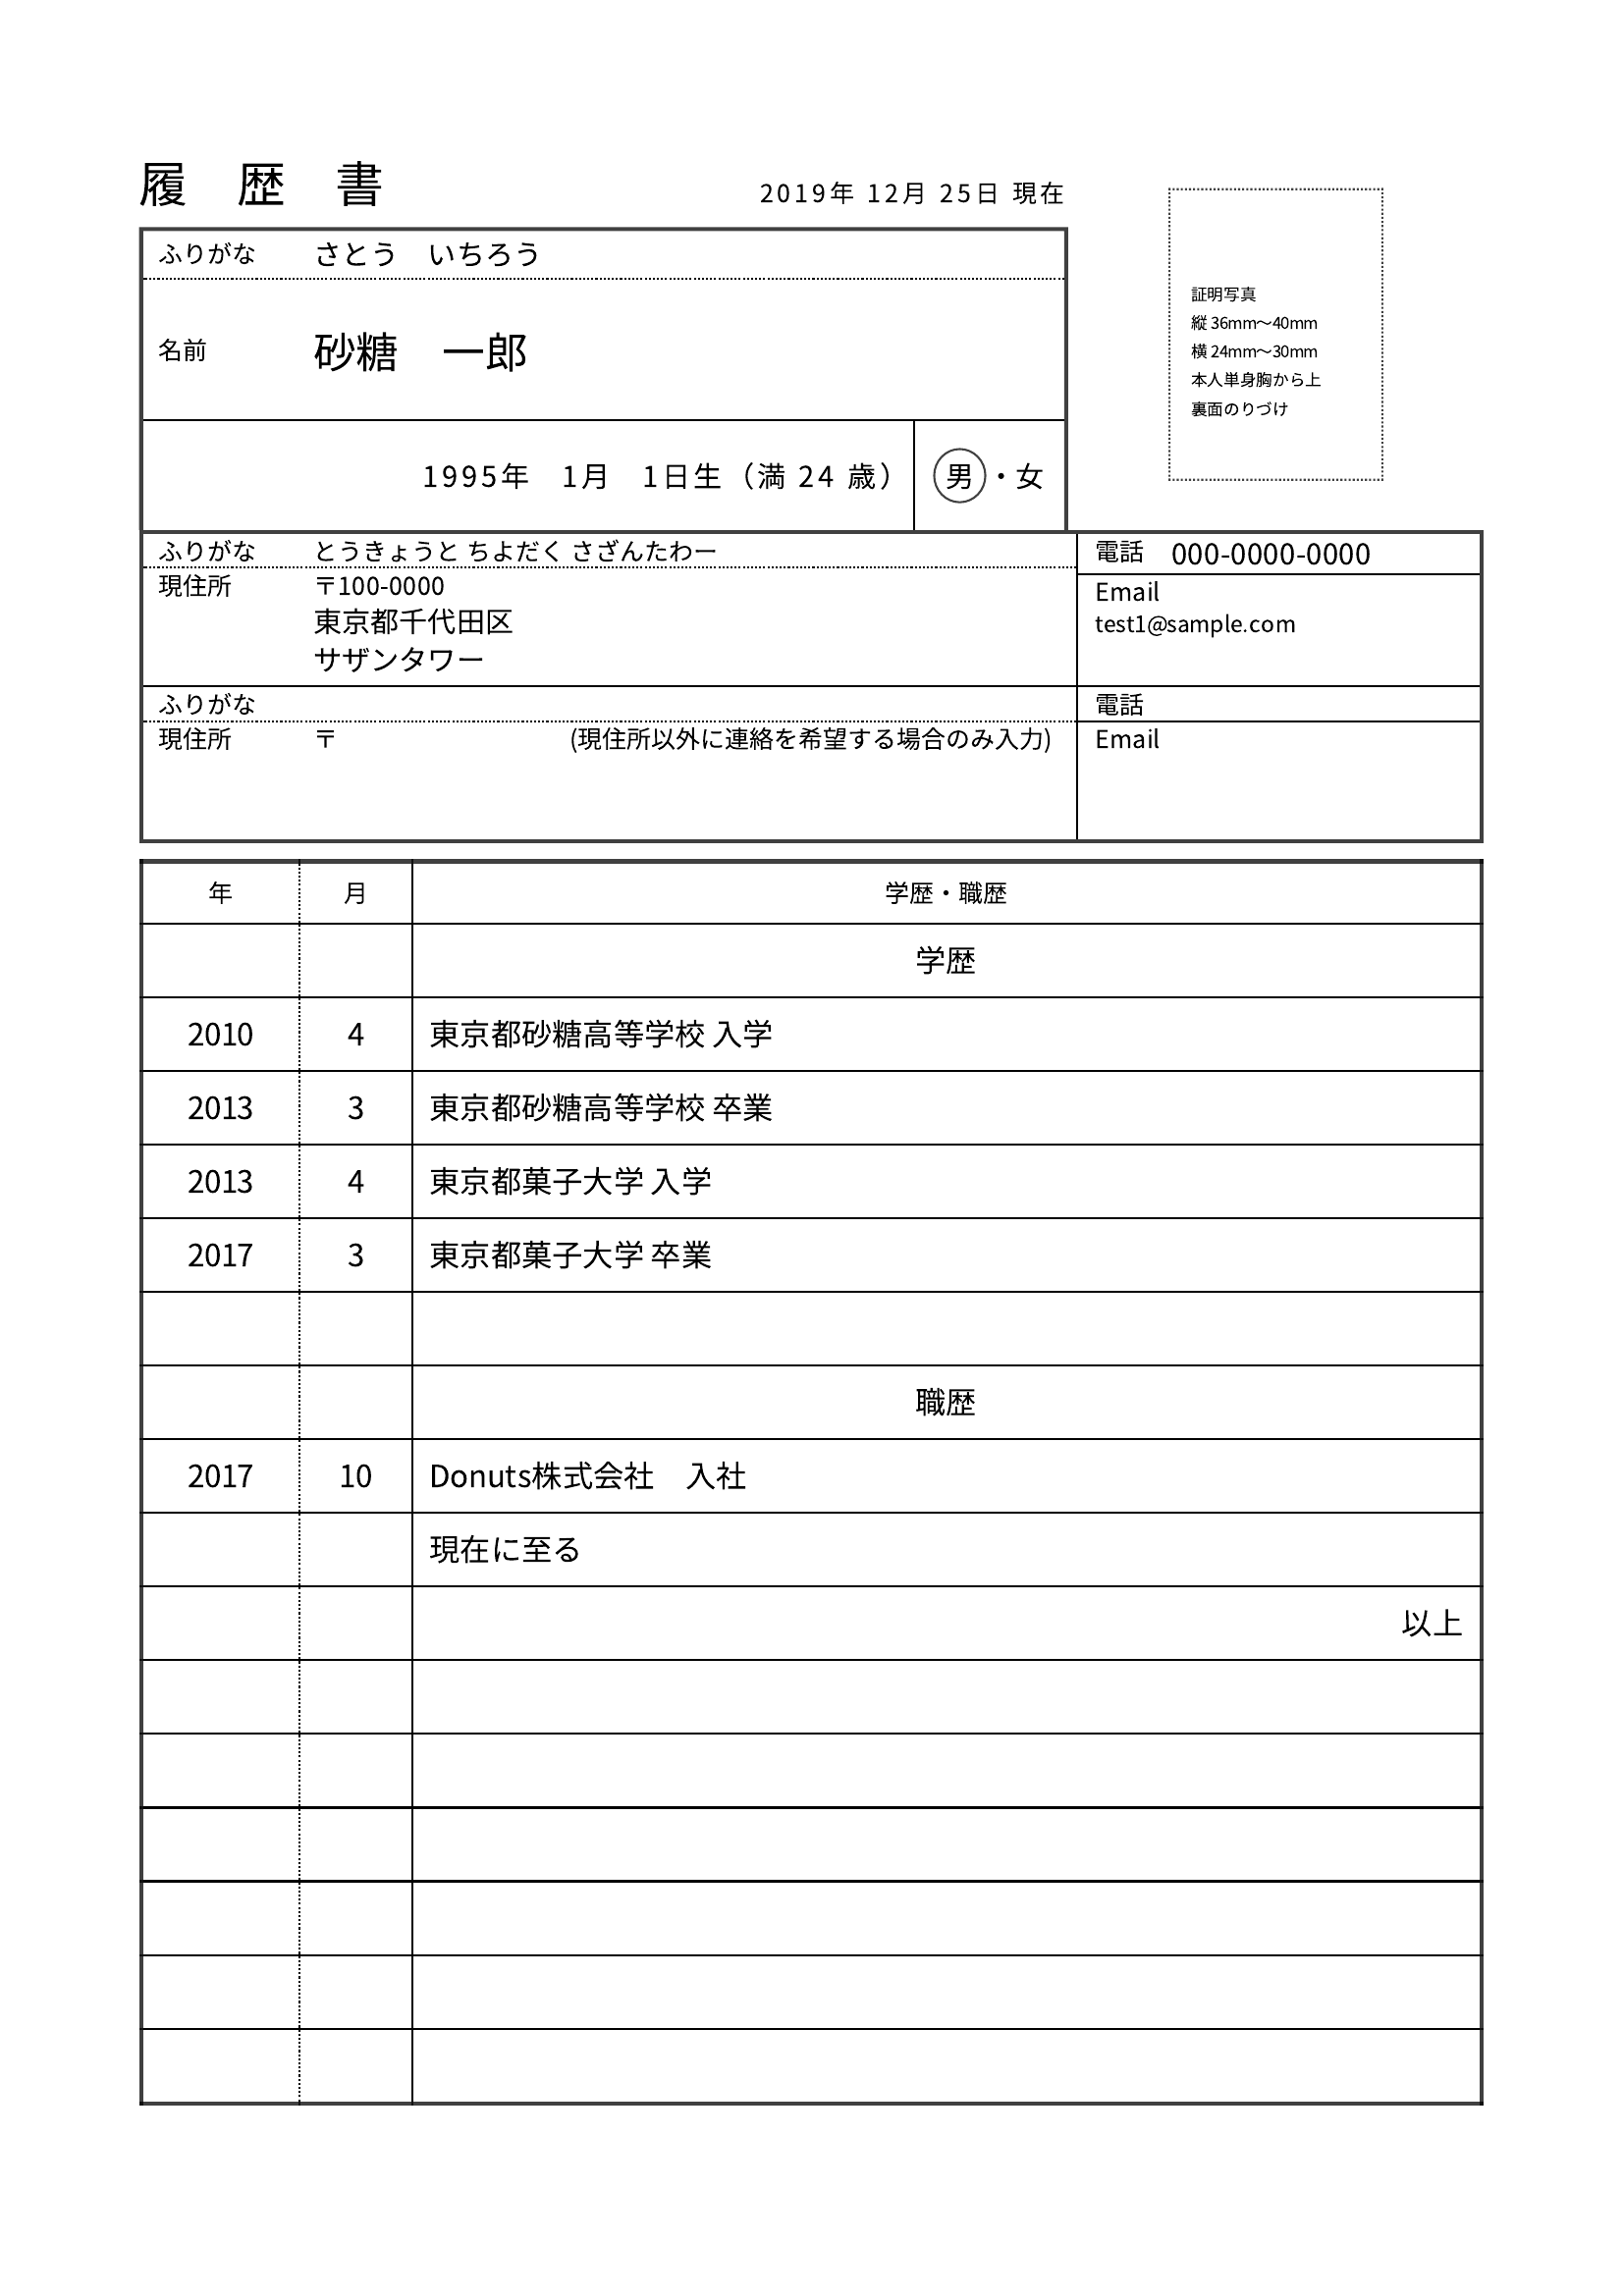

In [2]:
import base64
from pdf2image import convert_from_path, convert_from_bytes
file_path = file_list[0]

images = convert_from_path(file_path)

for index, image in enumerate(images):
    name = str(index) + '.png'
    image.save(name, 'png')

from IPython.display import Image
Image("./0.png")

In [3]:

from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
import re

def get_text(pdfname):
    # PDFファイル名が未指定の場合は、空文字列を返して終了
    if (pdfname == ''):
        return ''
    else:
        # 処理するPDFファイルを開く/開けなければ
        try:
            fp = open(pdfname, 'rb')
        except:
            return ''
        
    # リソースマネージャインスタンス
    rsrcmgr = PDFResourceManager()
    # 出力先インスタンス
    outfp = StringIO()
    # パラメータインスタンス
    laparams = LAParams()
    # 縦書き文字を横並びで出力する
    laparams.detect_vertical = True
    # デバイスの初期化

    laparams = LAParams(word_margin=10, line_margin=0.1, char_margin=10)

    device = TextConverter(rsrcmgr, outfp, laparams=laparams)
    # テキスト抽出インタプリタインスタンス
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # 対象ページを読み、テキスト抽出する。（maxpages：0は全ページ）
    for page in PDFPage.get_pages(fp, pagenos=None, maxpages=0, password=None,caching=True, check_extractable=True):
        interpreter.process_page(page)
    #取得したテキストをすべて読みだす
    ret = outfp.getvalue()
    # 後始末をしておく    
    fp.close()
    device.close()
    outfp.close()
    # 空白と改行をとりさり一塊のテキストとして返す
#     ret = re.sub(r"(?<!\r)\n",'',ret)
    ret = re.sub(r"\s",'',ret)
    ret = ret.lower() # 英字を小文字に変換

    return ret




text = get_text(file_path)


In [4]:
import neologdn 

normalize_text = neologdn.normalize(text)

print(text)

履歴書2019年12月25日現在ふりがなさとういちろう名前砂糖一郎1995年1月1日生（満24歳）男・女ふりがなとうきょうとちよだくさざんたわー電話000-0000-0000emailtest1@sample.comふりがな電話email年月学歴・職歴学歴20104東京都砂糖高等学校入学20133東京都砂糖高等学校卒業20134東京都菓子大学入学20173東京都菓子大学卒業職歴201710donuts株式会社入社現在に至る以上現住所〒100-0000東京都千代田区サザンタワー現住所〒(現住所以外に連絡を希望する場合のみ入力)証明写真縦36mm〜40mm横24mm〜30mm本人単身胸から上裏面のりづけ年･2年･2年月学歴・職歴年月免許・資格201212toeic公開テスト800点取得志望動機・特技・アピールポイントなどdonutsは、サービスやゲームにおいて1年、2年で終わってしまうようなものではなく、世の中に何らかの価値をもたらし、100年先にもその価値が残り続けるものを目指してプロダクト創りをしています。そのために社会や時流に変化をもたらすもの創り出していこうという想いを込めてサービスを作り出しています。通勤時間電車約1時間00分扶養家族数（配偶者を除く）0人配偶者有・無配偶者の扶養義務有・無本人希望欄（特に給料・職種・勤務時間・勤務地・その他について希望があれば記入）donutsは、サービスやゲームにおいて1年、2年で終わってしまうようなものではなく、世の中に何らかの価値をもたらし、100年先にもその価値が残り続けるものを目指してプロダクト創りをしています。そのために社会や時流に変化をもたらすもの創り出していこうという想いを込めてサービスを作り出しています。


In [5]:
def pull_out(text, word, buffer1, buffer2):
    num = 0
    text_list = []
    for i in range(len(text)):
        evalu = word in text[num:]
        if  evalu == True:
            num = text.find(word, num+1)
            t = text[num-buffer1:num+buffer2]
            text_list.append(t)
    return text_list
            
            

In [6]:
with open('./name1') as f:
    read_data = list(f)
    
name_list = [r.replace("\n", "") for r in read_data ]

def ngram(words, n):
    return list(zip(*(words[i:] for i in range(n))))

t_p = []

for ii in range(len(name_list)):
    noize_text = '名前' + name_list[ii] + '199'
    t_p.append(noize_text)
    
    
    
def ngram(words, n):

    return list(zip(*(words[i:] for i in range(n))))

def con(num, text):
    s = '{},'.format(num)
    for i in text:
        s += i
    return s.split(',') 


cc = []
num_ngram = 3
for num in range(len(t_p)):
    text_parts = t_p[num]
    n = ngram(text_parts, num_ngram)
    c = [con(num, t) for t in ngram(text_parts, num_ngram)]
    cc.append(c)
    
import csv
with open("training_data.csv", "w", newline='') as f:
    w = csv.writer(f, delimiter=",")
    w.writerow(['label', 'text'])
    for c in cc:
        for  data_list in c:       
            w.writerow(data_list)

            
# 回答データの作成

name_list = [[n] for n in name_list]

with open("replies.csv", "w", newline='') as f:
    w = csv.writer(f, delimiter=",")
    for  data_list in name_list:
        w.writerow(data_list)               

In [7]:
from os.path import dirname, join, normpath

import MeCab
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


class DialogueAgent:
    def __init__(self):
        self.tagger = MeCab.Tagger()

    def _tokenize(self, text): # 形態素解析
        node = self.tagger.parseToNode(text)

        tokens = []
        while node:
            if node.surface != '':
                tokens.append(node.surface)
 
            node = node.next
        return tokens

    def train(self, texts, labels): # 2. 文章とラベルからニューラルネットワークを更新
        pipeline = Pipeline([
            ('vecttorizer', CountVectorizer(tokenizer=self._tokenize)), 
            ('classifier', SVC()),
        ])
        pipeline.fit(texts, labels)
        self.pipeline = pipeline

    def predict(self, texts): # 3. 他の文章でのニューロンの反応をチェック
        return self.pipeline.predict(texts)


if __name__ == '__main__':
    BASE_DIR = normpath(dirname('__file__'))

    training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))  # 学習用読み込み文章

    dialogue_agent = DialogueAgent()
    dialogue_agent.train(training_data['text'], training_data['label']) # 学習用読み込み文章とラベルの組を学習

    with open(join(BASE_DIR, './replies.csv')) as f:  # 応答文章
        replies = f.read().split('\n')

    input_text = name[0]
    predictions = dialogue_agent.predict([input_text]) 
    predicted_class_id = predictions[0]  

    print('姓：', replies[predicted_class_id])



姓： 長谷川


# モック

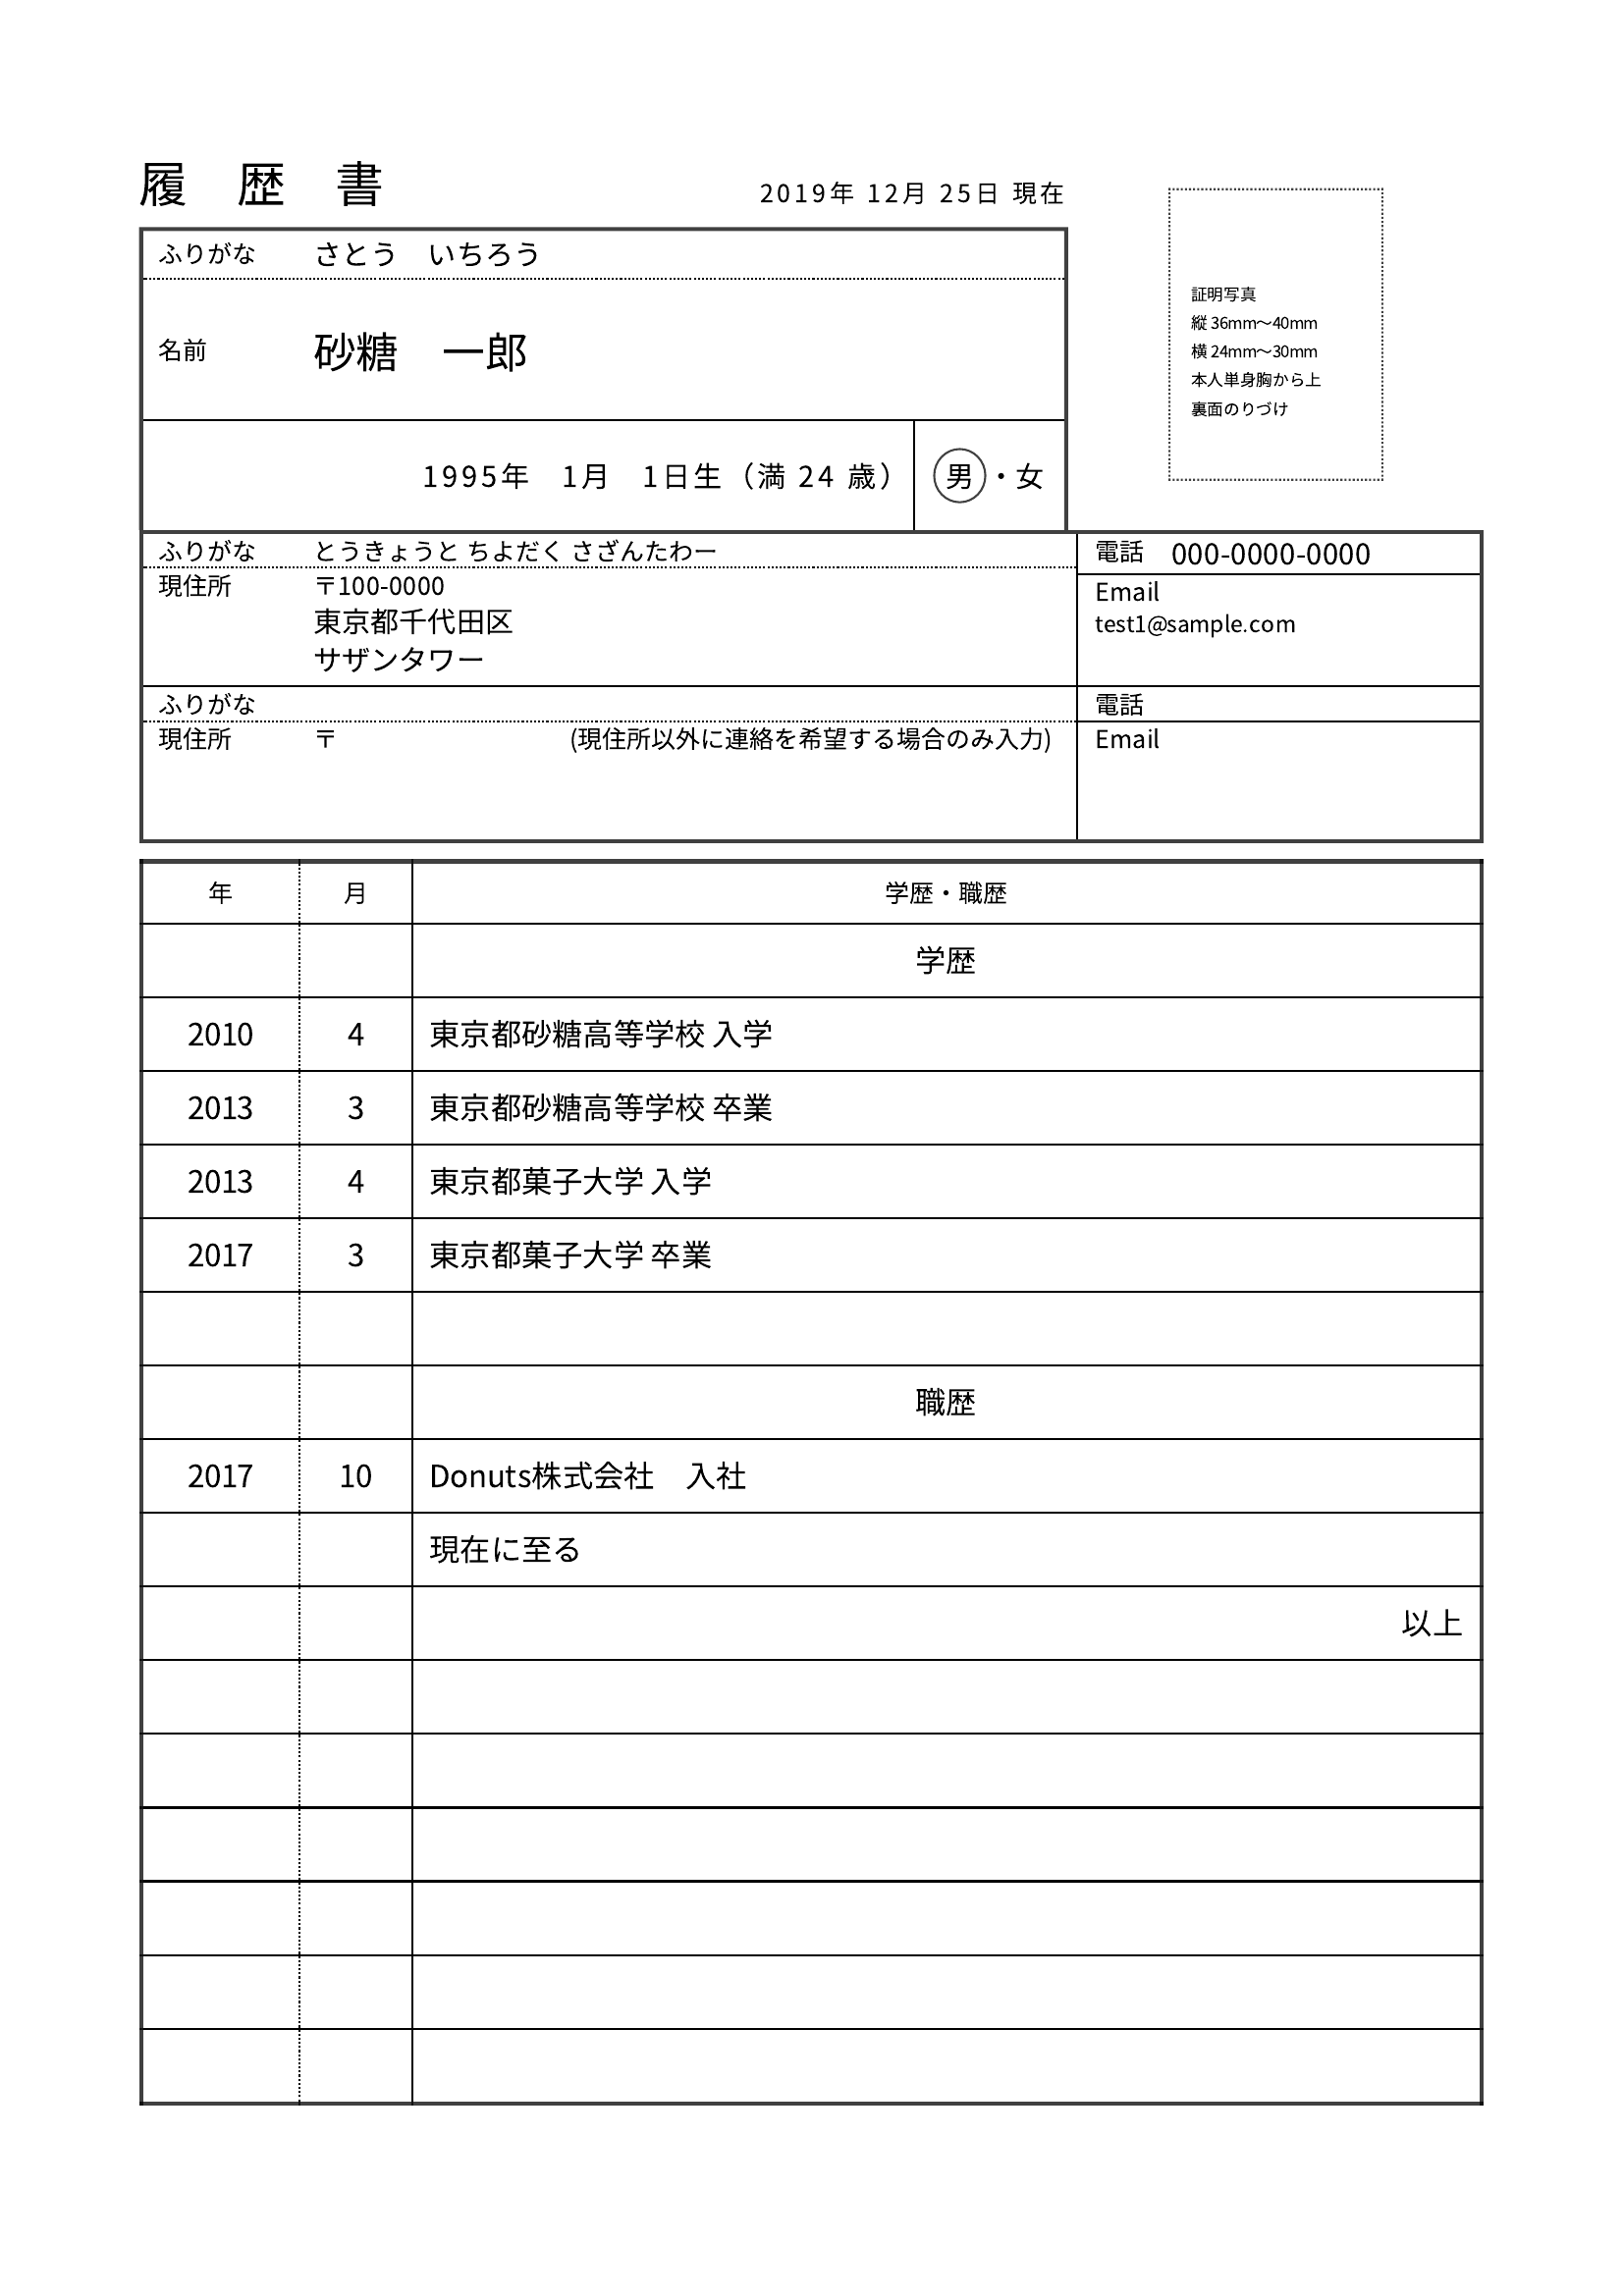

In [8]:
file_path = file_list[0] # これ以外のファイルはpdf可視化がいまいちできない。
images = convert_from_path(file_path)

for index, image in enumerate(images):
    name = str(index) + '.png'
    image.save(name, 'png')

from IPython.display import Image
Image("./0.png")

In [9]:

text = get_text(file_path)
text

'履歴書2019年12月25日現在ふりがなさとういちろう名前砂糖一郎1995年1月1日生（満24歳）男・女ふりがなとうきょうとちよだくさざんたわー電話000-0000-0000emailtest1@sample.comふりがな電話email年月学歴・職歴学歴20104東京都砂糖高等学校入学20133東京都砂糖高等学校卒業20134東京都菓子大学入学20173東京都菓子大学卒業職歴201710donuts株式会社入社現在に至る以上現住所〒100-0000東京都千代田区サザンタワー現住所〒(現住所以外に連絡を希望する場合のみ入力)証明写真縦36mm〜40mm横24mm〜30mm本人単身胸から上裏面のりづけ年･2年･2年月学歴・職歴年月免許・資格201212toeic公開テスト800点取得志望動機・特技・アピールポイントなどdonutsは、サービスやゲームにおいて1年、2年で終わってしまうようなものではなく、世の中に何らかの価値をもたらし、100年先にもその価値が残り続けるものを目指してプロダクト創りをしています。そのために社会や時流に変化をもたらすもの創り出していこうという想いを込めてサービスを作り出しています。通勤時間電車約1時間00分扶養家族数（配偶者を除く）0人配偶者有・無配偶者の扶養義務有・無本人希望欄（特に給料・職種・勤務時間・勤務地・その他について希望があれば記入）donutsは、サービスやゲームにおいて1年、2年で終わってしまうようなものではなく、世の中に何らかの価値をもたらし、100年先にもその価値が残り続けるものを目指してプロダクト創りをしています。そのために社会や時流に変化をもたらすもの創り出していこうという想いを込めてサービスを作り出しています。'

In [10]:
# history
print()
print('正規表現にて抽出 > 結構良い印象')

iterator = re.finditer(r'\d{5}', text)
num_list = [match.span()[0] for match in iterator]

for num in range(2, len(num_list)):
    try:
        print('経歴：', text[num_list[num]:num_list[num+1]])
    except IndexError:
        print('経歴：', text[num_list[num]:20])


正規表現にて抽出 > 結構良い印象
経歴： 20134東京都菓子大学入学
経歴： 20173東京都菓子大学卒業職歴
経歴： 201710donuts株式会社入社現在に至る以上現住所〒100-0000東京都千代田区サザンタワー現住所〒(現住所以外に連絡を希望する場合のみ入力)証明写真縦36mm〜40mm横24mm〜30mm本人単身胸から上裏面のりづけ年･2年･2年月学歴・職歴年月免許・資格
経歴： 


In [11]:
text = get_text(file_path)
# name

with open(join(BASE_DIR, './replies.csv')) as f:  # 応答文章
    replies = f.read().split('\n')
name = pull_out(text, '年月', 10, 0)
input_text = name[0]
predictions = dialogue_agent.predict([input_text]) 
predicted_class_id = predictions[0]  
name = replies[predicted_class_id]

try:
    print('姓：', name, ' (AI:SVM 利用) > ちょいちょいミスるので精度向上の工夫が必要、第二、第三候補を挙げて全検索すれば良いかも')
    iterator = re.finditer(name, text)
    num_list = [match.span()[1] for match in iterator]
    num = num_list[0]
    print('名：', text[num:num+2], ' 機械的に抽出 > AIを利用すれば精度良く抜き出せないこともない')
except IndexError:
    pass

    print()


# email
print('正規表現にて抽出 > もうちょっと頑張ればちゃんと抜き取れそう（こういう表記揺れっぽいのはAIを使えば行けるかも）')
pattern = "[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+"
email = pull_out(text, pattern, 10, 10)
mail = re.findall(pattern, text)[0]
print('mail：', mail)

# history
print()
print('正規表現にて抽出 > 結構良い印象')

iterator = re.finditer(r'\d{5}', text)
num_list = [match.span()[0] for match in iterator]

for num in range(2, len(num_list)):
    try:
        print('経歴：', text[num_list[num]:num_list[num+1]])
    except IndexError:
        print('経歴：', text[num_list[num]:20])

姓： 長谷川  (AI:SVM 利用) > ちょいちょいミスるので精度向上の工夫が必要、第二、第三候補を挙げて全検索すれば良いかも

正規表現にて抽出 > もうちょっと頑張ればちゃんと抜き取れそう（こういう表記揺れっぽいのはAIを使えば行けるかも）
mail： 000-0000-0000emailtest1@sample.com

正規表現にて抽出 > 結構良い印象
経歴： 20134東京都菓子大学入学
経歴： 20173東京都菓子大学卒業職歴
経歴： 201710donuts株式会社入社現在に至る以上現住所〒100-0000東京都千代田区サザンタワー現住所〒(現住所以外に連絡を希望する場合のみ入力)証明写真縦36mm〜40mm横24mm〜30mm本人単身胸から上裏面のりづけ年･2年･2年月学歴・職歴年月免許・資格
経歴： 


In [12]:
text

'履歴書2019年12月25日現在ふりがなさとういちろう名前砂糖一郎1995年1月1日生（満24歳）男・女ふりがなとうきょうとちよだくさざんたわー電話000-0000-0000emailtest1@sample.comふりがな電話email年月学歴・職歴学歴20104東京都砂糖高等学校入学20133東京都砂糖高等学校卒業20134東京都菓子大学入学20173東京都菓子大学卒業職歴201710donuts株式会社入社現在に至る以上現住所〒100-0000東京都千代田区サザンタワー現住所〒(現住所以外に連絡を希望する場合のみ入力)証明写真縦36mm〜40mm横24mm〜30mm本人単身胸から上裏面のりづけ年･2年･2年月学歴・職歴年月免許・資格201212toeic公開テスト800点取得志望動機・特技・アピールポイントなどdonutsは、サービスやゲームにおいて1年、2年で終わってしまうようなものではなく、世の中に何らかの価値をもたらし、100年先にもその価値が残り続けるものを目指してプロダクト創りをしています。そのために社会や時流に変化をもたらすもの創り出していこうという想いを込めてサービスを作り出しています。通勤時間電車約1時間00分扶養家族数（配偶者を除く）0人配偶者有・無配偶者の扶養義務有・無本人希望欄（特に給料・職種・勤務時間・勤務地・その他について希望があれば記入）donutsは、サービスやゲームにおいて1年、2年で終わってしまうようなものではなく、世の中に何らかの価値をもたらし、100年先にもその価値が残り続けるものを目指してプロダクト創りをしています。そのために社会や時流に変化をもたらすもの創り出していこうという想いを込めてサービスを作り出しています。'